In [2]:

# Import key libraries for data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import numpy as np


In [4]:

# Load the dataset and display initial rows to get an overview
data = pd.read_csv(r'C:\Users\Youcode\Desktop\Princip_Brief2\appartements_data.csv')
data.head()


,title,price,location,type_de_vente,salon,chamber,toilete,area,link
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,NaN,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
1,appartement à louer,2 400 DH,Casablanca,NaN,1.0,NaN,NaN,50.0,https://www.avito.ma/fr/al_qods/appartements/a...
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,NaN,1.0,NaN,NaN,150.0,https://www.avito.ma/fr/autre_secteur/appartem...
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,NaN,1.0,NaN,NaN,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...
4,Appartement 84 m²Al Baraka à Dcheïra El Jihadia,701 720 DH,Dcheïra El Jihadia,"Appartements, à vendre",1.0,3.0,2.0,84.0,https://www.avito.ma/fr/dche%C3%AFra_el_jihadi...


In [ ]:

# Resumez chaque colonne pour  les types, les valeurs manquantes et la structure
data_overview = pd.DataFrame({
    "Column Name": data.columns,
    "Data Type": data.dtypes,
    "Non-Missing Count": data.notnull().sum(),
    "Missing Values (%)": data.isnull().mean() * 100
})
data_overview


,Column Name,Data Type,Non-Missing Count,Missing Values (%)
title,title,object,1062,0.094073
price,price,object,930,12.511759
location,location,object,1062,0.094073
type_de_vente,type_de_vente,object,386,63.687676
salon,salon,float64,640,39.793039
chamber,chamber,float64,339,68.109125
toilete,toilete,float64,336,68.391345
area,area,float64,693,34.807150
link,link,object,1063,0.000000


C:\Users\Youcode\AppData\Local\Temp\ipykernel_19144\3243038369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent, palette="coolwarm")


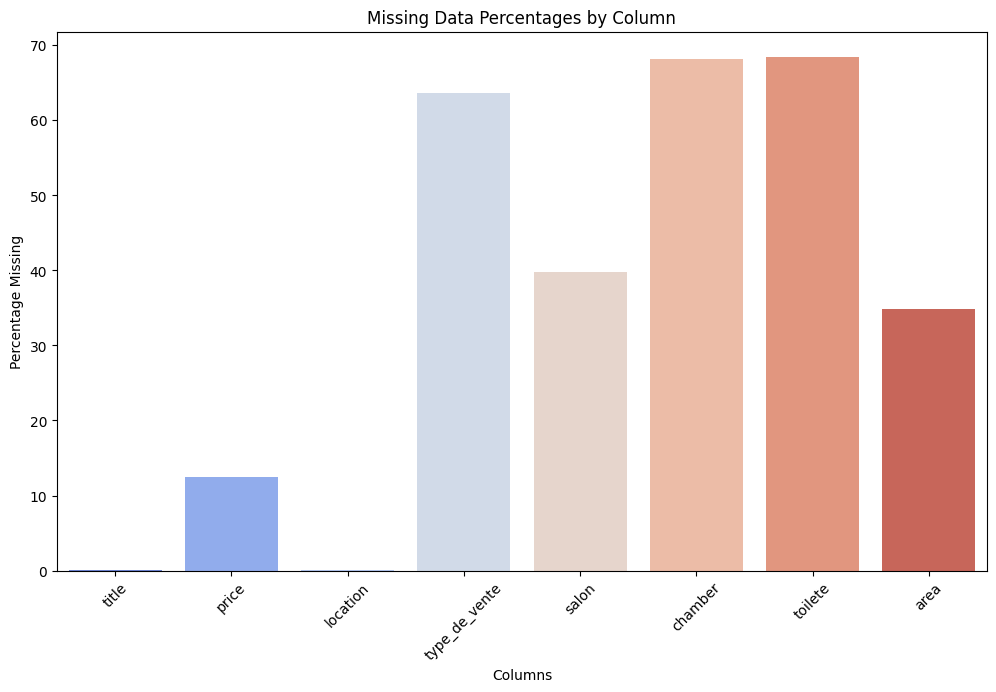

In [ ]:

# Tracer les pourcentages de données manquantes
missing_percent = data.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(12, 7))
sns.barplot(x=missing_percent.index, y=missing_percent, palette="coolwarm")
plt.title("Missing Data Percentages by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# je supprimer les caractères supplémentaires dans colonne 'price', pour convert en numerique
data['numeric_price'] = data['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)
data[['price', 'numeric_price']].head()  


,price,numeric_price
0,300 DH /Nuit,300.0
1,2 400 DH,2400.0
2,6 500 DH,6500.0
3,3 000 DH,3000.0
4,701 720 DH,701720.0


In [ ]:
# charger des valeurs manquantes dans les colonnes numériques avec des valeurs médianes
for col in ['salon', 'chamber', 'toilete', 'area']:
    data[col].fillna(data[col].median(), inplace=True)


imputer = KNNImputer(n_neighbors=3)
data[['numeric_price']] = imputer.fit_transform(data[['numeric_price']])


C:\Users\Youcode\AppData\Local\Temp\ipykernel_19144\861238964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Youcode\AppData\Local\Temp\ipykernel_19144\861238964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [ ]:

def infer_sale_type(text):
    text = str(text).lower()
    if any(word in text for word in ["louer", "location", "loué"]):
        return "rent"
    elif any(word in text for word in ["vendre", "vente", "à vendre"]):
        return "sale"
    return None

data['type_de_vente'] = data.apply(
    lambda row: row['type_de_vente'] if pd.notnull(row['type_de_vente']) else infer_sale_type(row['title']),
    axis=1
)
data['type_de_vente'].fillna("unknown", inplace=True)
data['type_de_vente'].value_counts()  


C:\Users\Youcode\AppData\Local\Temp\ipykernel_19144\1060274626.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type_de_vente'].fillna("unknown", inplace=True)


type_de_vente
unknown                   394
Appartements, à vendre    386
rent                      275
sale                        8
Name: count, dtype: int64

In [ ]:

data['price_z'] = zscore(data['numeric_price'])

outliers_price = data[(data['price_z'] > 3) | (data['price_z'] < -3)]
print("Number of Outliers in 'numeric_price':", len(outliers_price))


Number of Outliers in 'numeric_price': 8


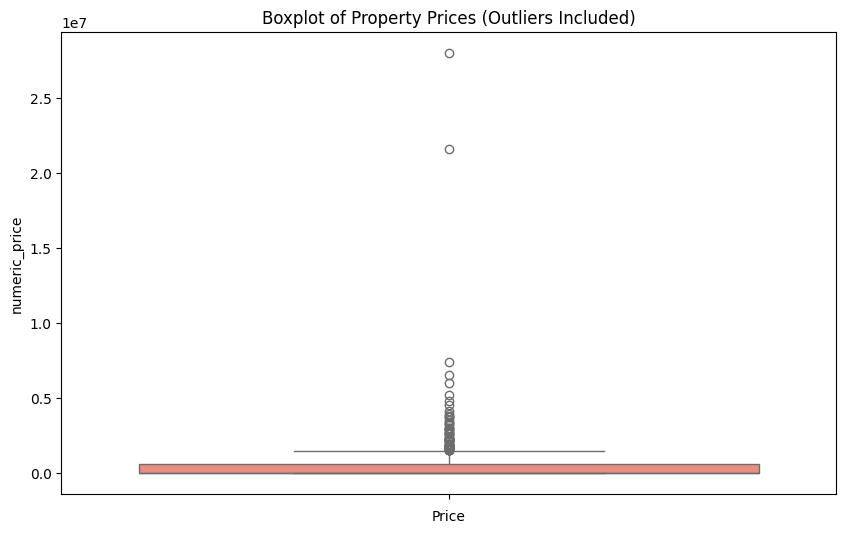

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data['numeric_price'], color="salmon")
plt.title("Boxplot of Property Prices (Outliers Included)")
plt.xlabel("Price")
plt.show()


Outliers in 'area': 109


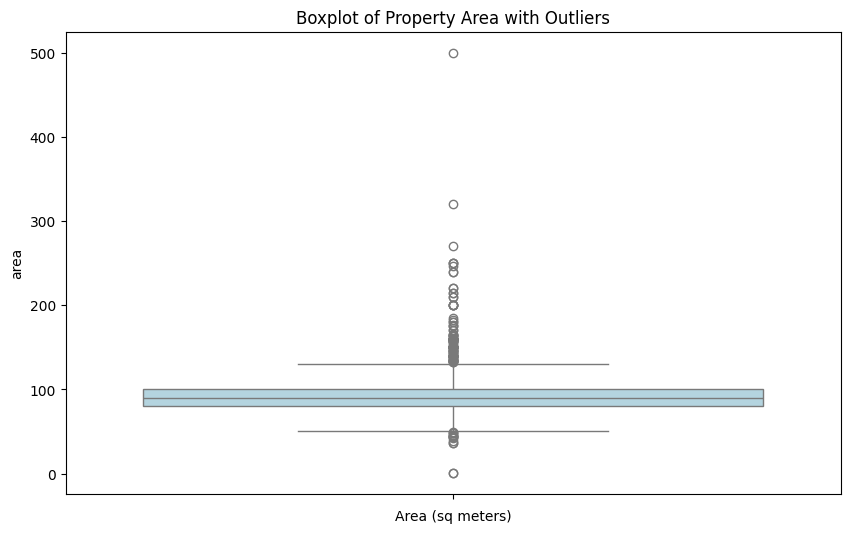

In [ ]:

Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
outliers_area = data[(data['area'] < (Q1 - 1.5 * IQR)) | (data['area'] > (Q3 + 1.5 * IQR))]
print("Outliers in 'area':", len(outliers_area))

plt.figure(figsize=(10, 6))
sns.boxplot(data['area'], color="lightblue")
plt.title("Boxplot of Property Area with Outliers")
plt.xlabel("Area (sq meters)")
plt.show()


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
data[['price_std', 'area_std']] = std_scaler.fit_transform(data[['numeric_price', 'area']])

minmax_scaler = MinMaxScaler()
data[['price_norm', 'area_norm']] = minmax_scaler.fit_transform(data[['numeric_price', 'area']])

data[['numeric_price', 'price_std', 'price_norm', 'area', 'area_std', 'area_norm']].head()  # Show transformed values


,numeric_price,price_std,price_norm,area,area_std,area_norm
0,300.0,-0.374968,0.000005,90.0,-0.144840,0.178357
1,2400.0,-0.373363,0.000080,50.0,-1.360754,0.098196
2,6500.0,-0.370229,0.000227,150.0,1.679030,0.298597
3,3000.0,-0.372904,0.000102,56.0,-1.178367,0.110220
4,701720.0,0.161227,0.025056,84.0,-0.327227,0.166333


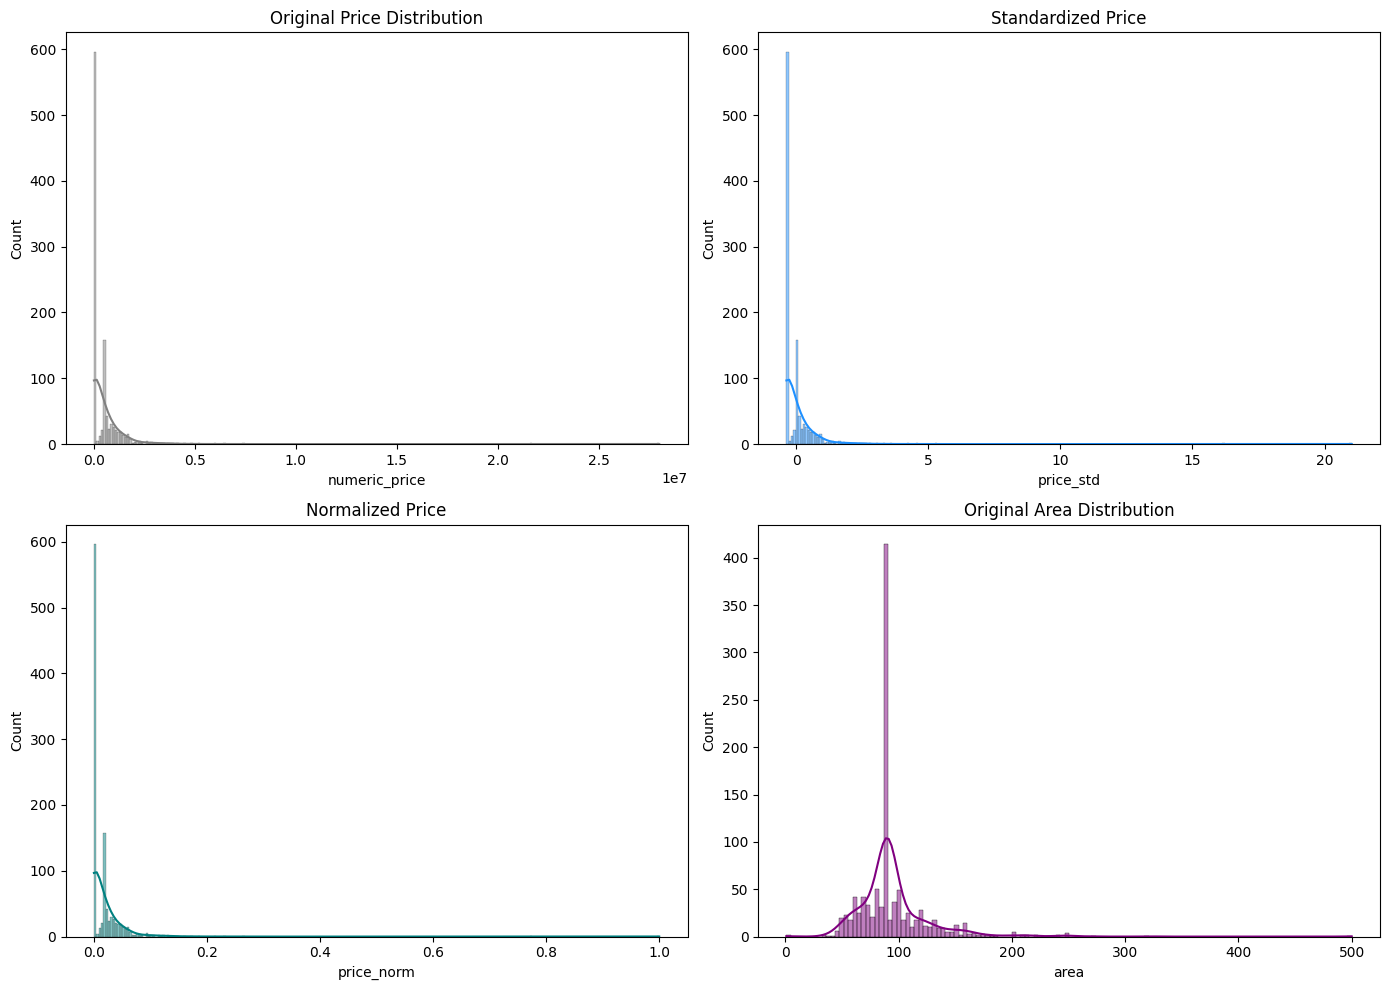

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data['numeric_price'], kde=True, ax=axes[0, 0], color="grey").set(title='Original Price Distribution')
sns.histplot(data['price_std'], kde=True, ax=axes[0, 1], color="dodgerblue").set(title='Standardized Price')
sns.histplot(data['price_norm'], kde=True, ax=axes[1, 0], color="teal").set(title='Normalized Price')
sns.histplot(data['area'], kde=True, ax=axes[1, 1], color="purple").set(title='Original Area Distribution')
plt.tight_layout()
plt.show()


In [16]:

from imblearn.over_sampling import SMOTE

data['type_code'] = data['type_de_vente'].astype('category').cat.codes

smote = SMOTE(random_state=42)
features = data[['price_std', 'area_std', 'salon', 'chamber', 'toilete']]
target = data['type_code']
balanced_features, balanced_target = smote.fit_resample(features, target)

pd.Series(balanced_target).value_counts()


type_code
1    394
3    394
0    394
2    394
Name: count, dtype: int64

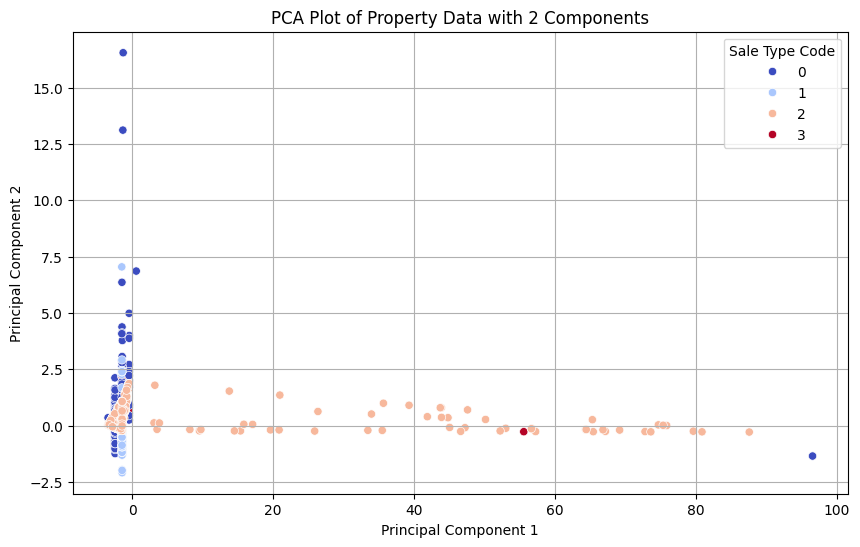

In [17]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(balanced_features)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['type_code'] = balanced_target

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='type_code', palette='coolwarm')
plt.title("PCA Plot of Property Data with 2 Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Sale Type Code')
plt.grid(True)
plt.show()
